In [1]:
#This is Random Forest tutorial analysis notebook

In [18]:
#import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#fetch data from file
heart = pd.read_csv(r"C:\Users\30158\Desktop\IIM-Project\randomForest\heart.csv");

In [15]:
print(type(heart))
heart.head()

<class 'pandas.core.frame.DataFrame'>


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#Summary of Heart Data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1    165
0    138
Name: target, dtype: int64


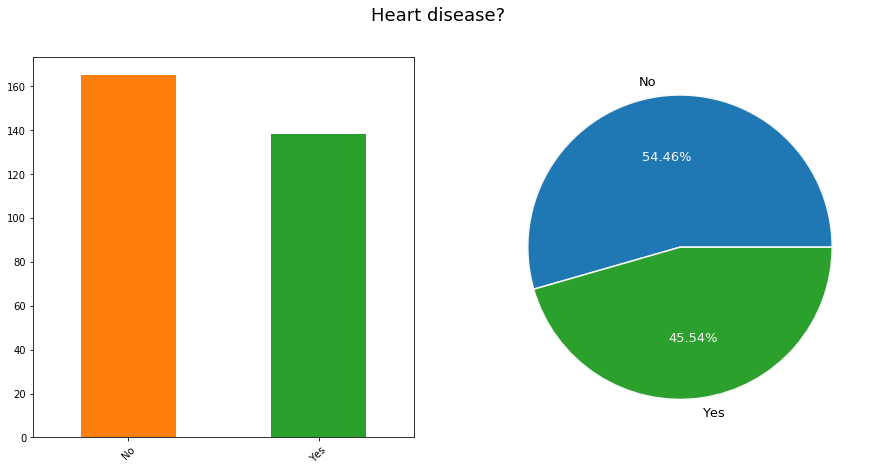

In [45]:
#PLot high level bar and Pie chart of data
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Heart disease?", fontsize = 18.)
print(heart.target.value_counts())
#plot bar chart on target column
_ = heart.target.value_counts().plot.bar(ax = ax[0], rot = 45,
                                            color = (
                                                sns.color_palette()[1],
                                                sns.color_palette()[2]
                                                )
                                        ).set(xticklabels = ["No", "Yes"])
#plot pie chart on target column
_ = heart.target.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],
                                        colors = (
                                                    sns.color_palette()[0],
                                                    sns.color_palette()[2]
                                                 ), 
                                                wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}
                                         ),
ax[1].texts[1].set_color("#F7F7F7"), 
ax[1].texts[3].set_color("#F7F7F7")

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes

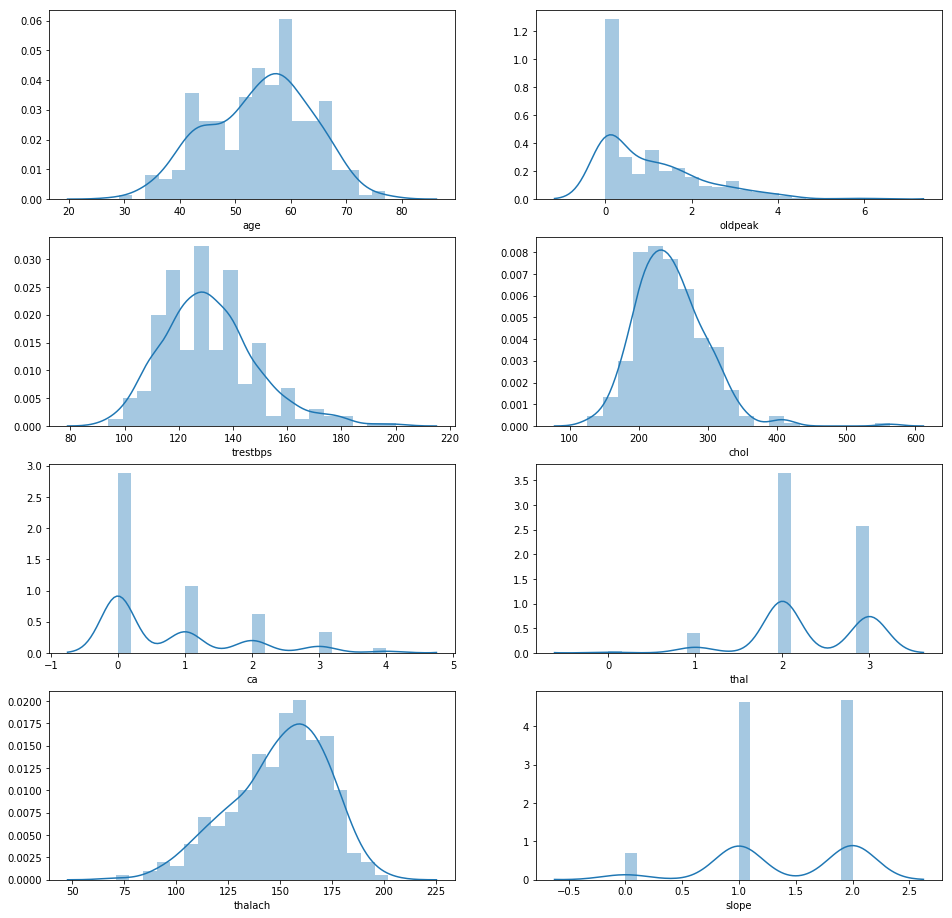

In [51]:
#Frequency distribution of attributes
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(heart.age, bins = 20, ax=ax[0,0])
sns.distplot(heart.oldpeak, bins = 20, ax=ax[0,1]) 
sns.distplot(heart.trestbps, bins = 20, ax=ax[1,0]) 
sns.distplot(heart.chol, bins = 20, ax=ax[1,1]) 
sns.distplot(heart.ca, bins = 20, ax=ax[2,0])
sns.distplot(heart.thal, bins = 20, ax=ax[2,1])
sns.distplot(heart.thalach, bins = 20, ax=ax[3,0]) 
sns.distplot(heart.slope, bins = 20, ax=ax[3,1]) 
plt.show()

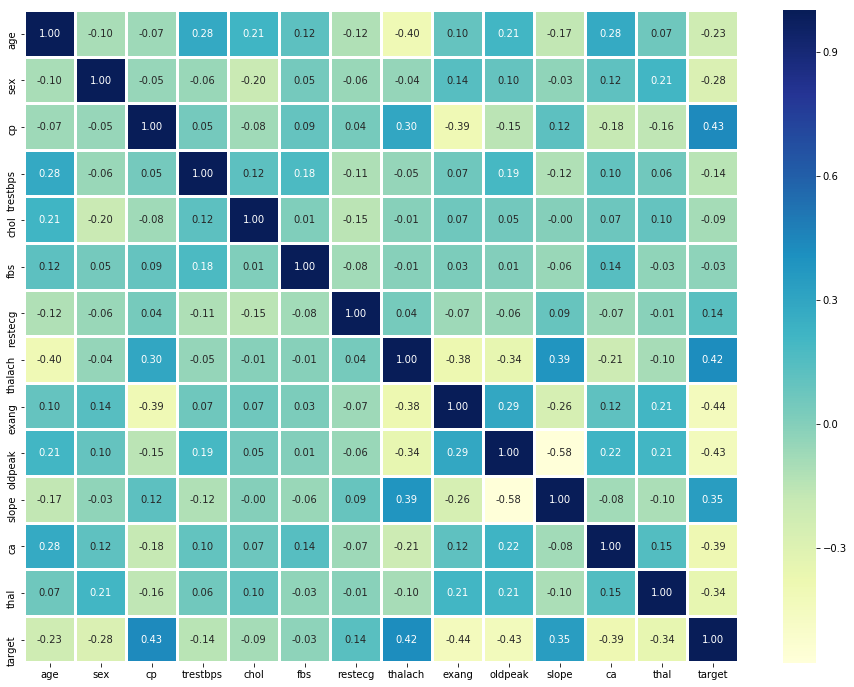

In [53]:
#Correlation matrix among variables in Heart table
plt.figure(figsize=(16,12))
sns.heatmap(heart.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)

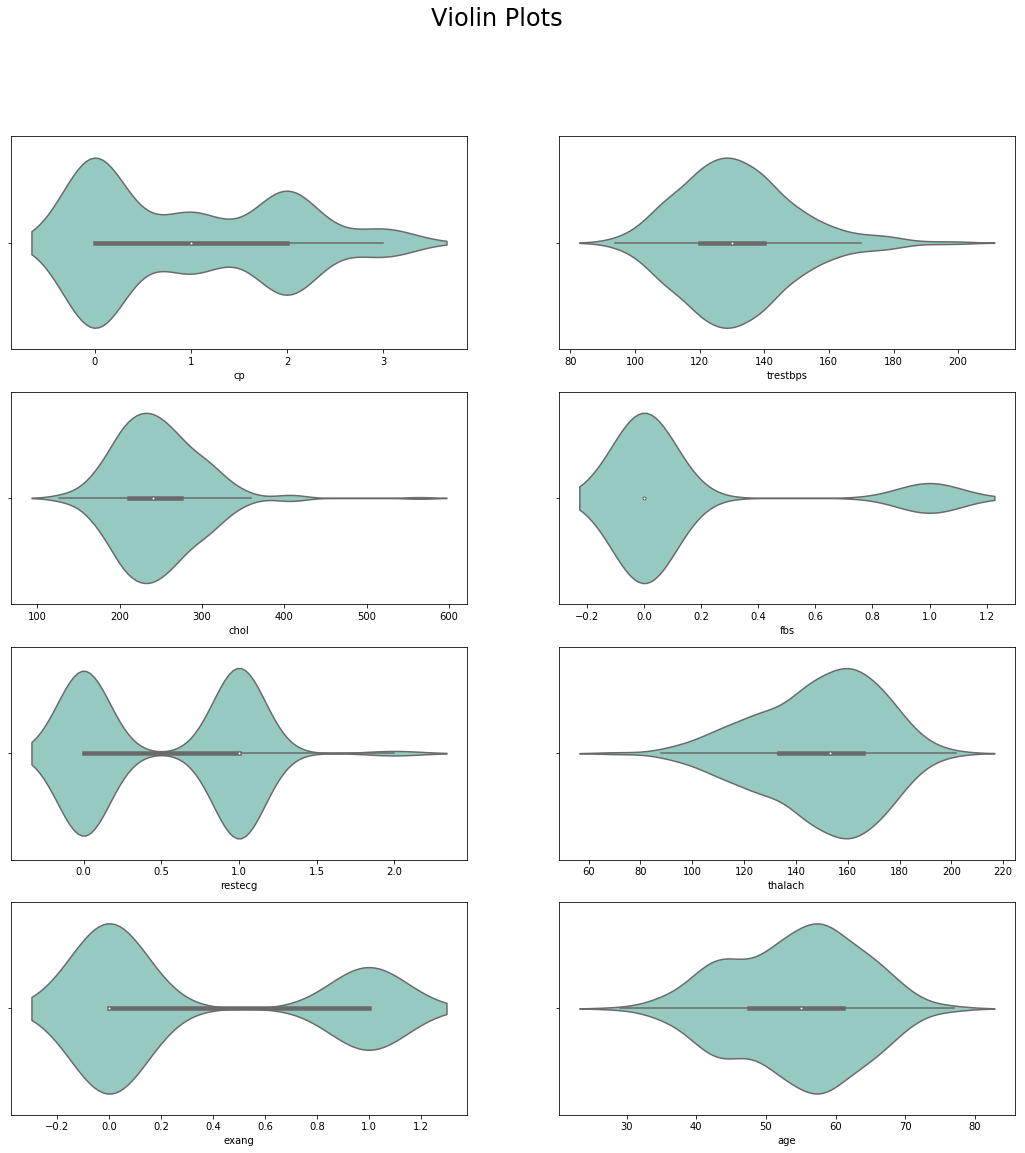

In [63]:
#Voilin plots for probability density function
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="cp", data=heart,ax=ax[0,0],palette='Set3')
sns.violinplot(x="trestbps", data=heart,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='chol', data=heart, ax=ax[1,0], palette='Set3')
sns.violinplot(x='fbs', data=heart, ax=ax[1,1],palette='Set3')
sns.violinplot(x='restecg', data=heart, ax=ax[2,0], palette='Set3')
sns.violinplot(x='thalach', data=heart, ax=ax[2,1],palette='Set3')
sns.violinplot(x='exang', data=heart, ax=ax[3,0],palette='Set3')
sns.violinplot(x='age', data=heart, ax=ax[3,1],palette='Set3')
plt.show()

In [66]:
#Import various classification model from sikitLearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
#Removing the target variable from Test Dataset
X = heart.iloc[:, :-1]
y = heart.iloc[:, -1]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [72]:
#Preparing the data for training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

age         76
sex         76
cp          76
trestbps    76
chol        76
fbs         76
restecg     76
thalach     76
exang       76
oldpeak     76
slope       76
ca          76
thal        76
dtype: int64

In [73]:
#Logistic Regression Analysis
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

Accuracy  82.89473684210526


[[24  4]
 [ 9 39]]


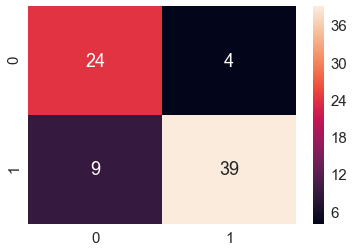

In [75]:
#Plot the confusion matrix for Logistic regression
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [81]:
#Decision Tree based modeling
#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

Accuracy  78.94736842105263


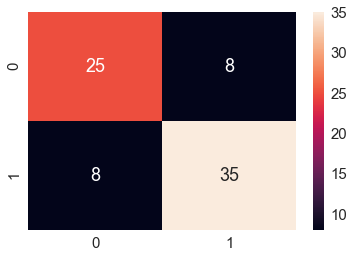

In [77]:
#Decision Tree confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [84]:
#Making Decision tree visualisation
feature_names = [i for i in heart.columns if heart[i].dtype in [np.int64]]

In [95]:
#Install Partial dependency plots
#python -m ensurepip --default-pip
#python -m pip install pdpbox
#conda install pdp
#!pip install pdpbox
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

Accuracy  80.26315789473685


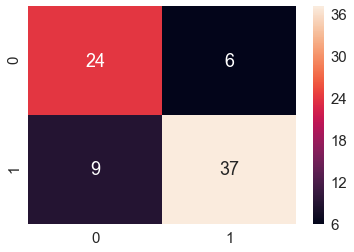

In [97]:
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [115]:
from sklearn.preprocessing import Imputer
def get_some_data():
    cols_to_use = X_train.columns
   # data = pd.read_csv('melb_data.csv')
    y = heart.target
    X = heart[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

In [116]:
# get_some_data is defined in hidden cell above.
X, y = get_some_data()
print(model)
print(model.n_features_)
print(X.shape[1])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
13
13


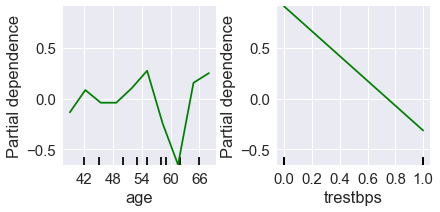

In [121]:
#Features Analysis
my_plots = plot_partial_dependence(model,       
                                   features=[0, 1], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['age', 'trestbps'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

In [11]:
#Feature Enginnearing for Heart Data
from platform import python_version
print(python_version())
!pip --version

3.6.5
pip 10.0.1 from C:\Program Files\Anaconda3\lib\site-packages\pip (python 3.6)



In [12]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org eli5

  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\30158\AppData\Local\pip\Cache\wheels\2b\67\89\414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate


distributed 1.21.8 requires msgpack, which is not installed.
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: 'C:\\Program Files\\Anaconda3\\Lib\\site-packages\\tabulate.py'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --user eli5

distributed 1.21.8 requires msgpack, which is not installed.
  The script tabulate.exe is installed in 'C:\Users\30158\AppData\Roaming\Python\Python36\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [19]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --user msgpack

You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [25]:
#permutation importance
import eli5

ModuleNotFoundError: No module named 'eli5'